country
United States           305788
Germany                 182659
China                    73011
United Kingdom           71606
France                   59570
Canada                   58600
Netherlands              52367
Czechia                  48122
Japan                    46553
Switzerland              38093
Australia                35746
Italy                    30671
Poland                   20002
New Zealand              18444
Spain                    14939
Austria                  11758
Sweden                    9851
Finland                   8815
Denmark                   7412
Bulgaria                  7357
Hungary                   7080
Belgium                   6628
Norway                    6004
India                     5689
United Arab Emirates      5264
Singapore                 5205
Brazil                    5022
Hong Kong                 4767
Malaysia                  4538
Pakistan                  4462
Indonesia                 4248
Russia                    4087


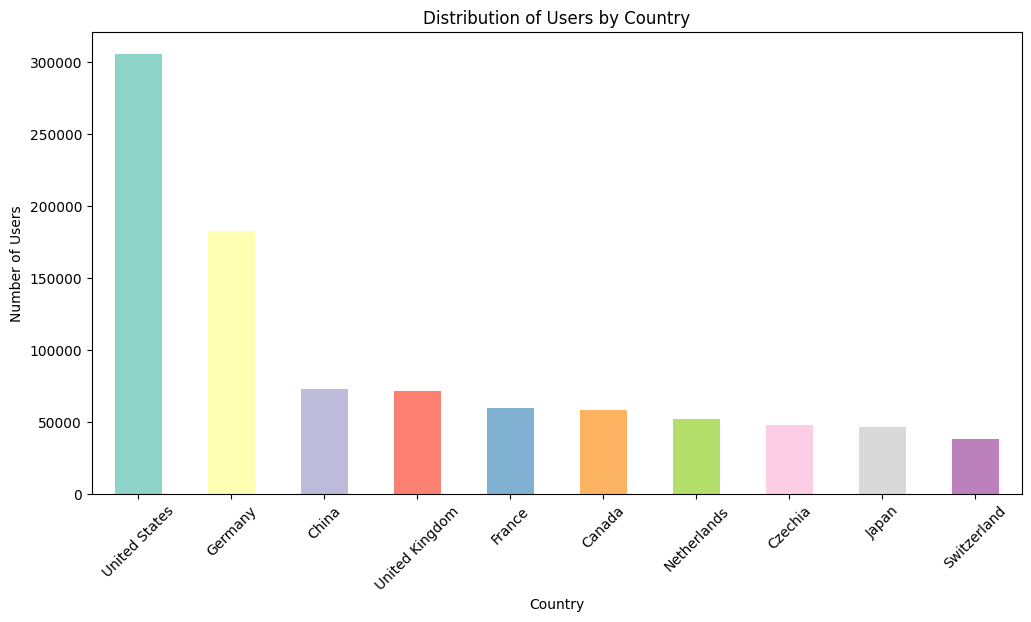

location
Germany                               107747
Prague                                 37757
Japan                                  26986
Palo Alto, CA                          19215
UK                                     17789
                                       ...  
北京                                       644
Everything everywhere all at once.       635
Delaware (but Philly at heart)           599
Seville, Spain                           582
Phoenixville, PA                          75
Name: count, Length: 344, dtype: int64


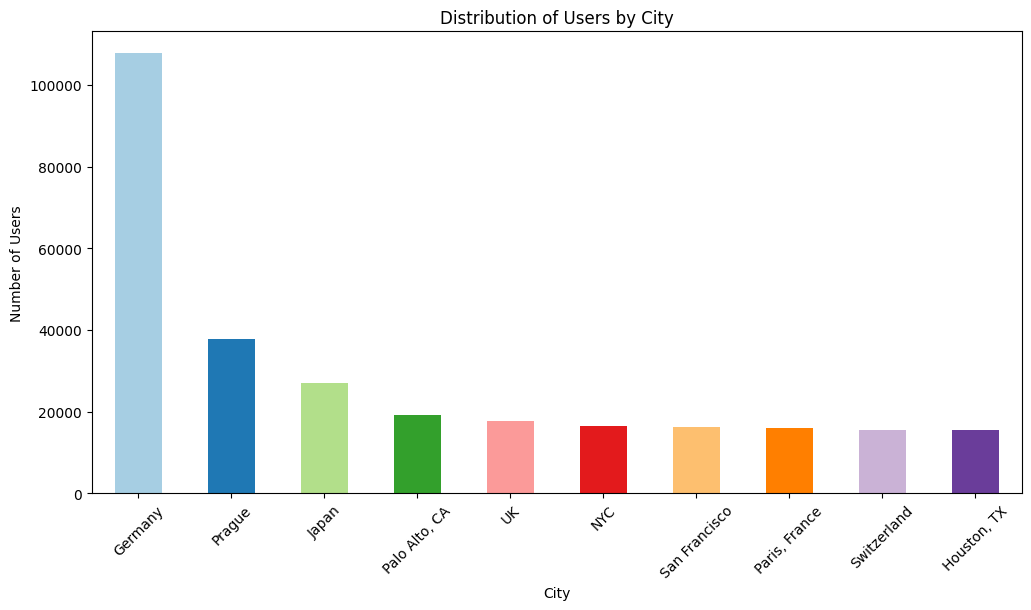

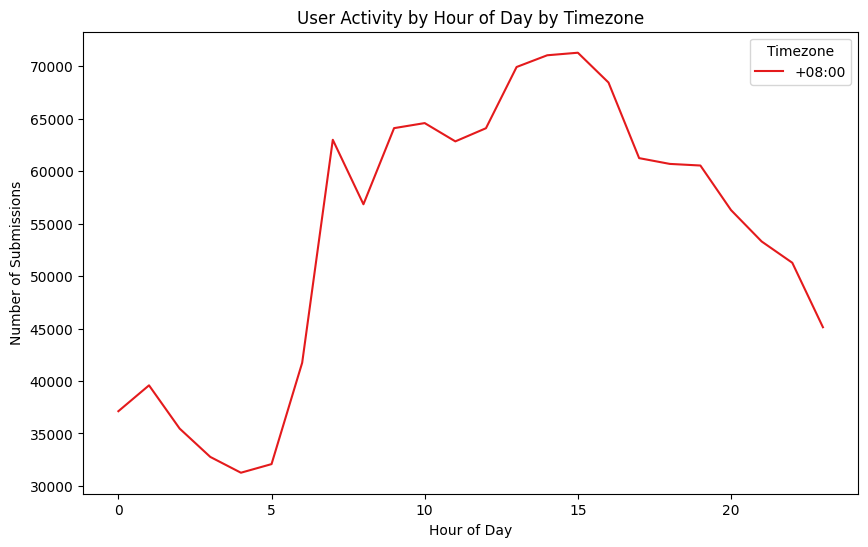

所有用户的提交次数：
              name  commit_count
0       1715173329          1276
1            88250          2040
2      AkihiroSuda          2966
3        Aleksanaa          3620
4      AlexWaygood          3735
..             ...           ...
492     zachdaniel          2087
493         zanieb          4019
494  zhangdaiscott           644
495         zirain          1593
496      zzstoatzz          1898

[497 rows x 2 columns]
高活跃用户（提交次数 > 1000）占比：92.15%
低活跃用户（提交次数 < 100）占比：0.20%
高活跃用户：
            name  commit_count
0     1715173329          1276
1          88250          2040
2    AkihiroSuda          2966
3      Aleksanaa          3620
4    AlexWaygood          3735
..           ...           ...
491       yuwata          2397
492   zachdaniel          2087
493       zanieb          4019
495       zirain          1593
496    zzstoatzz          1898

[458 rows x 2 columns]
低活跃用户：
           name  commit_count
454  tmcconechy            75
                       event_type   count
0  

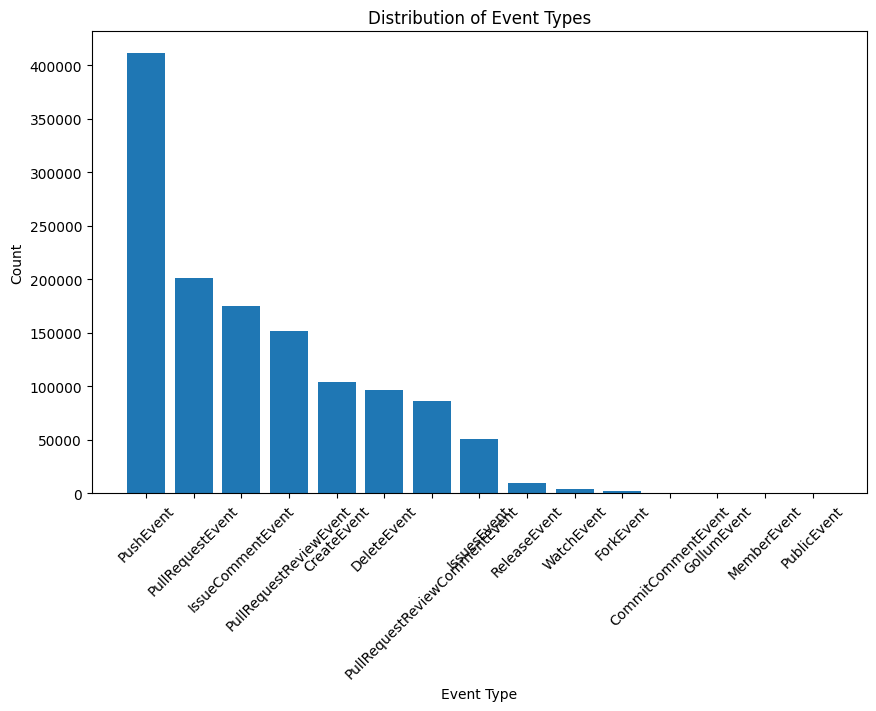

  event_action   count
0        added  617218
1      created  411961
2       closed  173489
3       opened   76406
4    published    9455
5      started    3809
6     reopened    2438


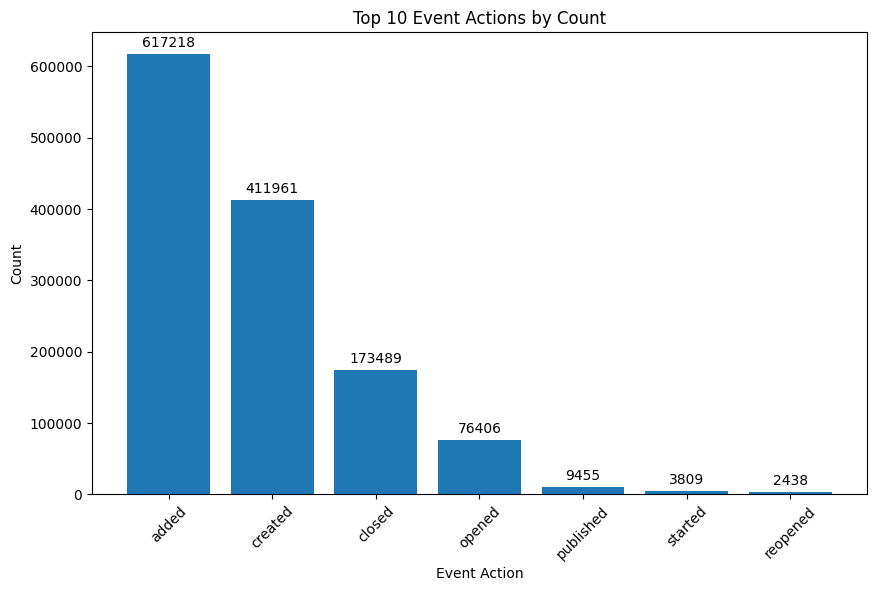

              name  total_influence
121         bdraco      1776.967163
49          Koenkk      1674.805908
203         fabaff      1590.152954
149  charliermarsh      1580.198242
215         frenck      1520.352173
..             ...              ...
148         chalin       339.133759
19     DEV-DIBSTER       339.097839
404     sbueringer       339.053680
235    haslinghuis       338.719574
304    loicmathieu       338.532318

[497 rows x 2 columns]


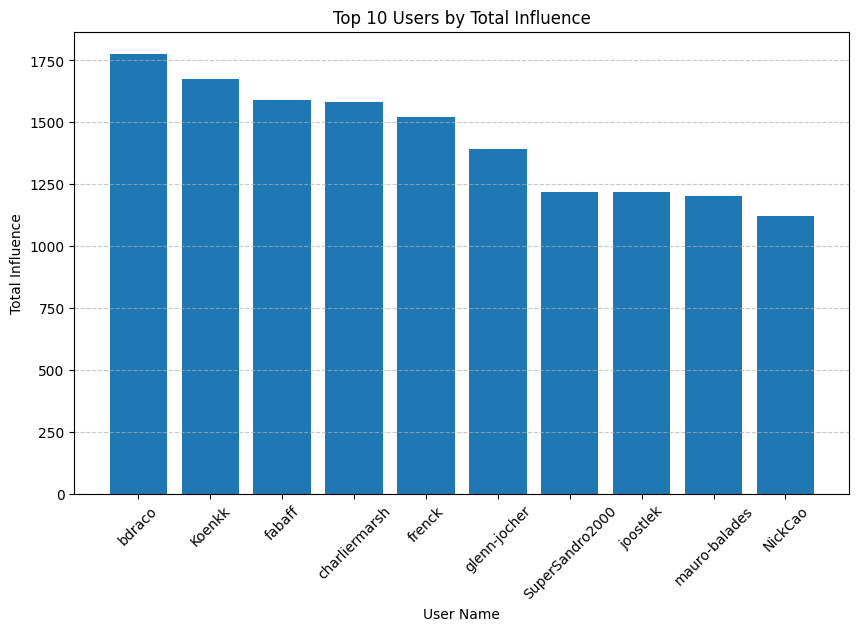

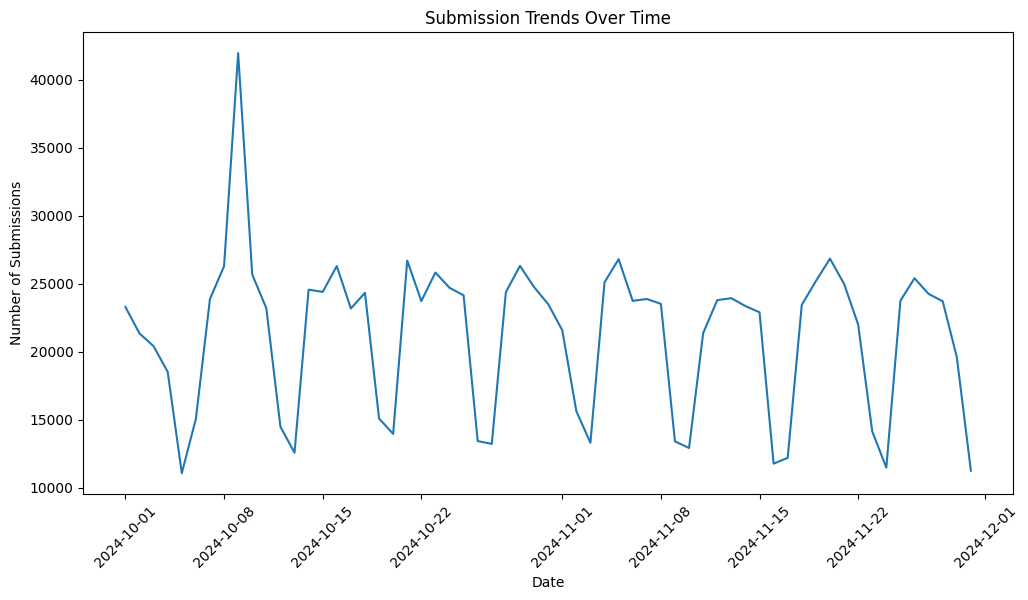

In [ ]:
# 数据获取与合并
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 定义文件路径列表
file_paths = [
    'users_combined_info_500_part_1.csv',
    'users_combined_info_500_part_2.csv',
    'users_combined_info_500_part_3.csv',
    'users_combined_info_500_part_4.csv',
    'users_combined_info_500_part_5.csv',
    'users_combined_info_500_part_6.csv',
    'users_combined_info_500_part_7.csv'
]

# 合并文件
merged_data = pd.DataFrame()
for file_path in file_paths:
    part_data = pd.read_csv(file_path)
    merged_data = pd.concat([merged_data, part_data])

# 重置索引
merged_data.reset_index(drop=True, inplace=True)

# 人口统计分析

# 国家和地区分布：统计用户所在国家和地区的分布，识别主要的开发者集中地。
# 统计国家和地区分布
country_distribution = merged_data['country'].value_counts()
print(country_distribution)

# 选取排名前十的国家
top_countries = country_distribution.head(10)

# 绘制国家和地区分布柱状图，设置颜色使其更美观
plt.figure(figsize=(12, 6))
colors = plt.cm.Set3(range(len(top_countries)))
top_countries.plot(kind='bar', color=colors)
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Country')
plt.xticks(rotation=45)  # 旋转 x 轴标签，防止重叠
plt.show()

# 城市级别分布：分析主要城市的开发者密度，发现技术热点区域。
city_distribution = merged_data['location'].value_counts()
print(city_distribution)

# 选取排名前十的城市
top_cities = city_distribution.head(10)

# 绘制城市级别分布柱状图，同样设置颜色
plt.figure(figsize=(12, 6))
colors = plt.cm.Paired(range(len(top_cities)))
top_cities.plot(kind='bar', color=colors)
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by City')
plt.xticks(rotation=45)
plt.show()

# 时区分布
# 提取时区信息
merged_data['timezone'] = merged_data['event_time'].str.extract(r'([+-]\d{2}:\d{2})$')

# 从 event_time 中提取小时信息并创建 hour 列
merged_data['hour'] = pd.to_datetime(merged_data['event_time']).dt.hour

# 按时区统计提交次数
hour_counts_by_timezone = merged_data.groupby('timezone')['hour'].value_counts().sort_index()

# 绘制图表，添加图例说明
plt.figure(figsize=(10, 6))
sns.lineplot(x=hour_counts_by_timezone.index.get_level_values(1), 
             y=hour_counts_by_timezone.values,
             hue=hour_counts_by_timezone.index.get_level_values(0), palette='Set1')
plt.title('User Activity by Hour of Day by Timezone')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Submissions')
plt.legend(title='Timezone')  # 添加图例标题
plt.show()

# 协作行为分析

# 提交频率：统计每个用户的提交次数，识别高活跃用户和低活跃用户。
# 计算每个用户的提交次数
commit_frequency = merged_data.groupby('name')['event_time'].count().reset_index()
commit_frequency.columns = ['name', 'commit_count']

# 识别高活跃和低活跃用户，添加比例信息
total_users = len(commit_frequency)
high_active_users = commit_frequency[commit_frequency['commit_count'] > 1000]
low_active_users = commit_frequency[commit_frequency['commit_count'] < 100]
high_active_percentage = len(high_active_users) / total_users * 100
low_active_percentage = len(low_active_users) / total_users * 100

# 打印所有用户的提交次数及比例信息
print("所有用户的提交次数：")
print(commit_frequency)
print(f"高活跃用户（提交次数 > 1000）占比：{high_active_percentage:.2f}%")
print(f"低活跃用户（提交次数 < 100）占比：{low_active_percentage:.2f}%")
print("高活跃用户：")
print(high_active_users)
print("低活跃用户：")
print(low_active_users)

# 其他维度有趣的洞察（至少 2 个）

# 活动类型分析
# 统计 event_type
event_type_counts = merged_data['event_type'].value_counts().reset_index()
event_type_counts.columns = ['event_type', 'count']

print(event_type_counts)

plt.figure(figsize=(10, 6))
plt.bar(event_type_counts['event_type'], event_type_counts['count'])
plt.xlabel('Event Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Distribution of Event Types')
plt.show()

# event_action 分析
# 统计每一个 event_action 的数量
event_action_counts = merged_data['event_action'].value_counts().reset_index()
event_action_counts.columns = ['event_action', 'count']

# 打印统计结果
print(event_action_counts)

# 选取前十名
top_ten_event_actions = event_action_counts.head(10)

# 绘制柱状图，添加数据标签
plt.figure(figsize=(10, 6))
bars = plt.bar(top_ten_event_actions['event_action'], top_ten_event_actions['count'])
plt.xlabel('Event Action')
plt.ylabel('Count')
plt.title('Top 10 Event Actions by Count')
plt.xticks(rotation = 45)
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 像素的垂直偏移
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.show()

# 个人影响力分析
# 按 name 分组并取每组中 total_influence 最大的值
sorted_data = merged_data.groupby('name')['total_influence'].max().reset_index()

# 按 total_influence 从大到小排序
sorted_data = sorted_data.sort_values(by='total_influence', ascending=False)

print(sorted_data)

# 选取前十名
top_ten_users = sorted_data.head(10)

# 提取前十名用户的 name 和 total_influence
names = top_ten_users['name']
influences = top_ten_users['total_influence']

# 绘制柱状图，添加网格线使图表更清晰
plt.figure(figsize=(10, 6))
plt.bar(names, influences)
plt.xlabel('User Name')
plt.ylabel('Total Influence')
plt.title('Top 10 Users by Total Influence')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加垂直网格线
plt.show()

# 时间趋势分析
# 按日期统计提交数量（假设 event_time 可提取日期信息，若不能需先转换）
merged_data['date'] = pd.to_datetime(merged_data['event_time']).dt.date
date_submission_counts = merged_data.groupby('date')['event_time'].count().reset_index()
date_submission_counts.columns = ['date', 'submission_count']

plt.figure(figsize=(12, 6))
plt.plot(date_submission_counts['date'], date_submission_counts['submission_count'])
plt.xlabel('Date')
plt.ylabel('Number of Submissions')
plt.title('Submission Trends Over Time')
plt.xticks(rotation=45)
plt.show()